# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Rahmatulloh Daffa Izzuddin Wahid
- **Email:** 
- **ID Dicoding:** zudd_in

## Menentukan Pertanyaan Bisnis

- Bagaimana tingkat mobilitas kota pada waktu tertentu, kapan cenderung terjadi keramaian?
- Apa saja faktor yang menyebabkan ramainya mobilitas kota dengan sepeda?

## Import Semua Packages/Library yang Digunakan

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

## Data Wrangling

### Gathering Data

In [23]:
!rm -rf dataset
!gdown 1RaBmV6Q6FYWU4HWZs80Suqd7KQC34diQ -O dataset.zip
!unzip dataset.zip -d dataset
!rm dataset.zip

Downloading...
From: https://drive.google.com/uc?id=1RaBmV6Q6FYWU4HWZs80Suqd7KQC34diQ
To: /home/izzudd/Dev/dicoding-adp/dataset.zip
100%|████████████████████████████████████████| 280k/280k [00:00<00:00, 2.33MB/s]
Archive:  dataset.zip
  inflating: dataset/Readme.txt      
  inflating: dataset/day.csv         
  inflating: dataset/hour.csv        


In [24]:
df = pd.read_csv('dataset/hour.csv')

### Assessing Data

Kondisi data dilihat dengan mendaftar kolom apa saya yang ada berikut ringkasan setiap kolom dan mengecek apakah ada nilai null, nan, dan duplikat pada data.

Terdapat 17 kolom pada data dengan rincian sebagai berikut:
- `instant`: record index
- `dteday` : date
- `season` : season (1:winter, 2:spring, 3:summer, 4:fall)
- `yr` : year (0: 2011, 1:2012)
- `mnth` : month ( 1 to 12)
- `hr` : hour (0 to 23)
- `holiday` : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- `weekday` : day of the week
- `workingday` : if day is neither weekend nor holiday is 1, otherwise is 0.
- `weathersit` : 
  - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- `temp` : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- `atemp`: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- `hum`: Normalized humidity. The values are divided to 100 (max)
- `windspeed`: Normalized wind speed. The values are divided to 67 (max)
- `casual`: count of casual users
- `registered`: count of registered users
- `cnt`: count of total rental bikes including both casual and registered

In [25]:
df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


Tidak terdapat nilai null, nan, dan duplikat pada data.

In [26]:
print('How many data is null?', df.isnull().sum().sum())
print('How many data is nan?', df.isna().sum().sum())
print('How many data duplicated?', df.duplicated().sum())

How many data is null? 0
How many data is nan? 0
How many data duplicated? 0


Hasil pengecekan terhadap tipe data memperlihatkan adanya data dteday dengan tipe object, data ini dapat diubah menjadi tipe datetime.

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


### Cleaning Data

Mengubah format data beberapa kolom:
- `detday` menjadi `datetime`
- `yt` menjadi tahun 2011 dan 2012
- `mnth`, `weekday`, `season` menjadi ordinal `string` (category)
- `holiday`, `workingday` menjadi `boolean`
- mengembalikan suhu ke celsius

In [28]:
from pandas.api.types import CategoricalDtype

cat_weekday = CategoricalDtype(categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
cat_season = CategoricalDtype(categories=['winter', 'spring', 'summer', 'fall'], ordered=True)
cat_month = CategoricalDtype(categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
clean_df = df.copy()
clean_df['dteday'] = pd.to_datetime(df['dteday'])
clean_df['yr'] = clean_df['dteday'].dt.year

clean_df['mnth'] = clean_df['dteday'].dt.month_name().astype(cat_month)
clean_df['weekday'] = clean_df['dteday'].dt.day_name().astype(cat_weekday)
clean_df['season'] = clean_df['season'].map({1:'winter', 2:'spring', 3:'summer', 4:'fall'}).astype(cat_season)

clean_df['holiday'] = clean_df['holiday'].astype(bool)
clean_df['workingday'] = clean_df['workingday'].astype(bool)

clean_df['temp'] = clean_df['temp'] * (39 + 8) - 8
clean_df['atemp'] = clean_df['atemp'] * (50+16) - 16
clean_df['windspeed'] = clean_df['windspeed'] * 67
clean_df['hum'] = clean_df['hum'] * 100

clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  int32         
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  bool          
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  bool          
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [29]:
clean_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,winter,2011,January,0,False,Saturday,False,1,3.28,3.0014,81.0,0.0,3,13,16
1,2,2011-01-01,winter,2011,January,1,False,Saturday,False,1,2.34,1.9982,80.0,0.0,8,32,40
2,3,2011-01-01,winter,2011,January,2,False,Saturday,False,1,2.34,1.9982,80.0,0.0,5,27,32
3,4,2011-01-01,winter,2011,January,3,False,Saturday,False,1,3.28,3.0014,75.0,0.0,3,10,13
4,5,2011-01-01,winter,2011,January,4,False,Saturday,False,1,3.28,3.0014,75.0,0.0,0,1,1


## Exploratory Data Analysis (EDA)

### Explore jumlah pesepeda pada tiap harinya

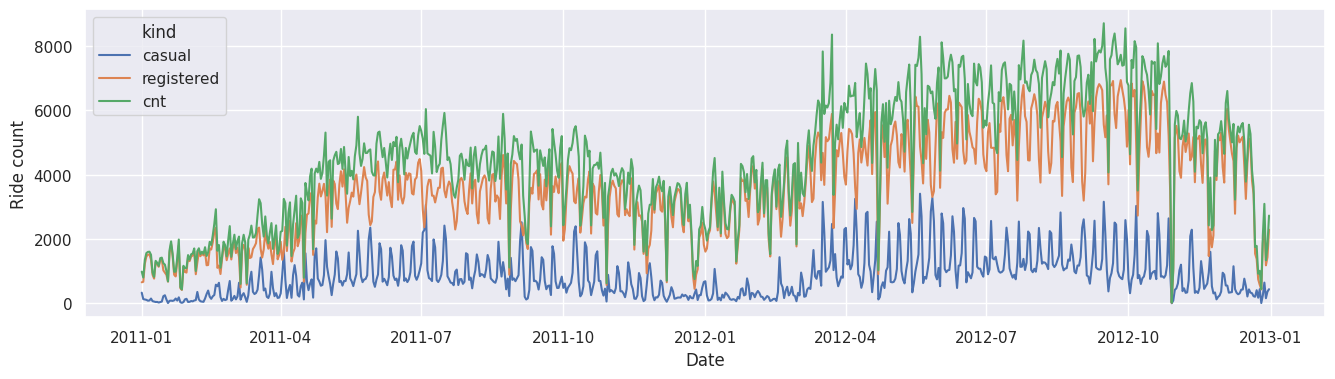

In [30]:

all_day_cnt = clean_df.groupby('dteday')[['casual', 'registered', 'cnt']].sum().reset_index()
all_day_cnt = all_day_cnt.melt(id_vars=['dteday'], var_name='kind', value_name='sum')
plt.figure(figsize=(16, 4))
sns.lineplot(all_day_cnt, hue='kind', x='dteday', y='sum')
plt.ylabel('Ride count')
plt.xlabel('Date')
plt.show()

Hasil plot menunjukkan adanya pola jumlah pesepeda yang naik turun dengan interval tertentu. Asumsi awal yang dihasilkan adalah faktor hari libur, pada hari libur pesepeda akan cenderung menurun. Dapat dilihat juga bahwa terjadi kenaikan jumlah pesepeda pada tahun 2012 relatif terhadap tahun 2011.

Keramaian pesepeda cenderung berada pada pertengahan tahun, dapat diasumsikan hal ini terjadi karena musim panas yang terjadi, sedangkan pada musim salju (akhir dan awal tahun) pengunaan sepeda relatif lebih sedikit.

### Explore hubungan antara fitur alam (temp, atemp, hum, dan windspeed) dengan banyaknya pesepeda

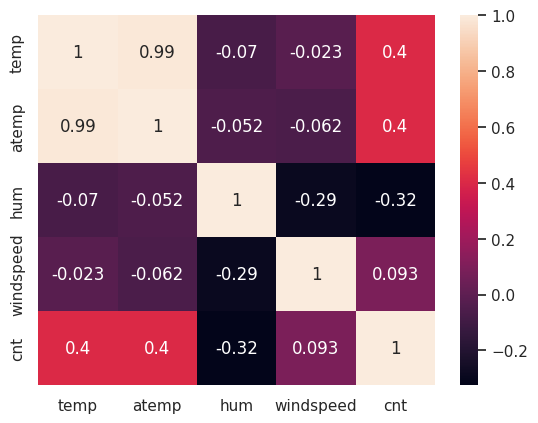

In [31]:
natural_cols = ['temp', 'atemp', 'hum', 'windspeed']
correlation = clean_df[[*natural_cols, 'cnt']].corr()
sns.heatmap(correlation, annot=True)
plt.show()

Dari heatmap tersebut didapatkan bahwa banyaknya pesepeda berbanding lurus dengan temperatur dan cenderung berbanding terbalik dengan kelembaban. Dengan kata lain:
- Semakin tinggi temperatur semakin banyak pesepeda
- Semakin rendah kelembaban semakin banyak pesepeda
- Kecepatan angin tidak memiliki kontribusi signifikan pada jumlah pesepeda

### Explore distribusi fitur alam (temp, atemp, hum, dan windspeed)

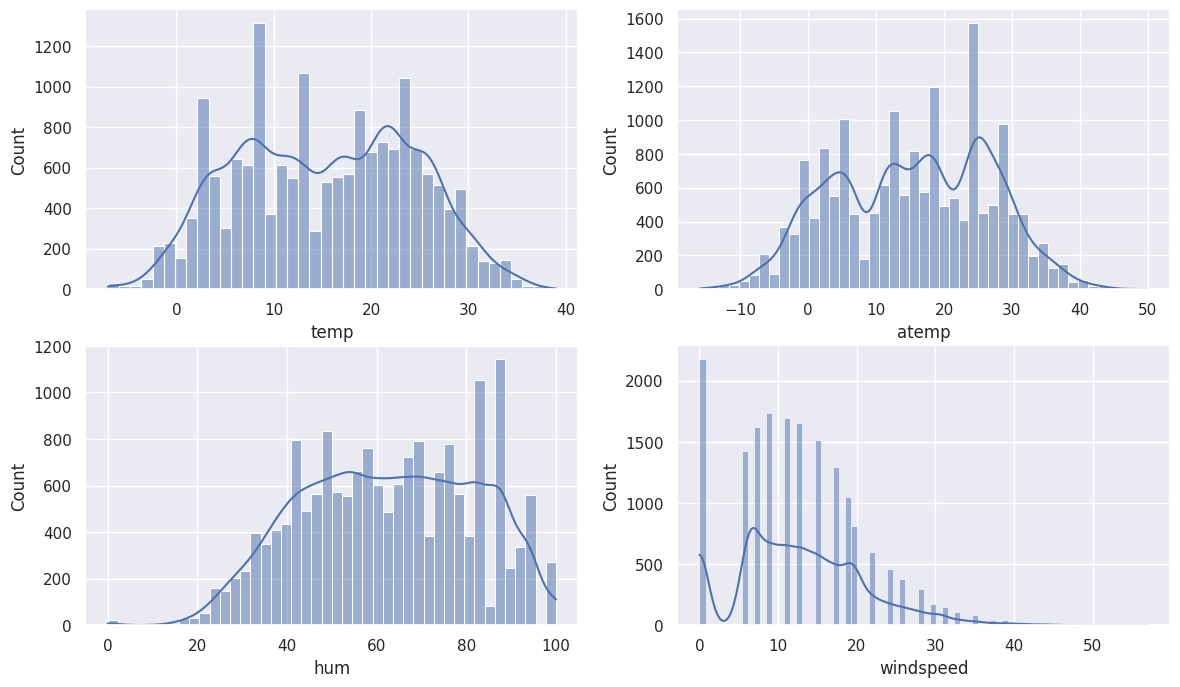

In [32]:
fig, ax = plt.subplots(2, 2, figsize=(14, 8))
natural_dist = clean_df[natural_cols]
for i, col in enumerate(natural_cols):
  _ax = ax[i//2,i%2]
  plot = sns.histplot(natural_dist, x=col, kde=True, ax=_ax)

Hasil plotting memperlihakan bahwa semua data cenderung terdistribusi normal kecuali `windspeed` yang right skewed, hal ini sekaligus menjelaskan mengapa kecepatan angin tidak berpengaruh secara signifikan pada jumlah pesepeda.

### Explore klaster peserbaran musim berdasarkan temperatur dan jumlah pesepeda

[]

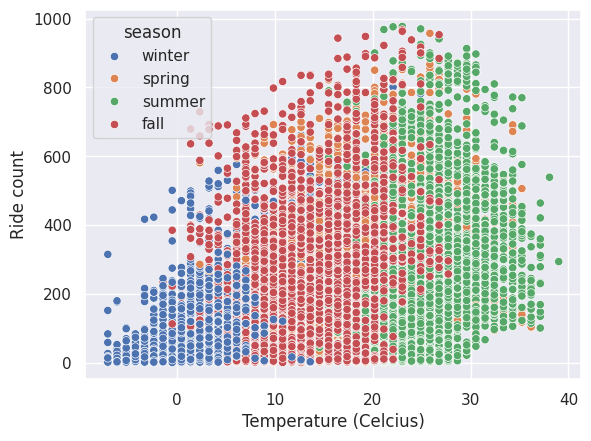

In [33]:
sns.scatterplot(clean_df, x='temp', y='cnt', hue='season')
plt.ylabel('Ride count')
plt.xlabel('Temperature (Celcius)')
plt.plot()

Hasil plot menunjukkan klaster berdasarkan suhu dan jumlah pesepeda cukup terlihat jelas pada musim panas dan dingin. Musim semi dan gugur memiliki persebarab suhu dan jumlah pesepeda yang cukup seragam

### Explore jumlah sampel pada tiap musim dan jam

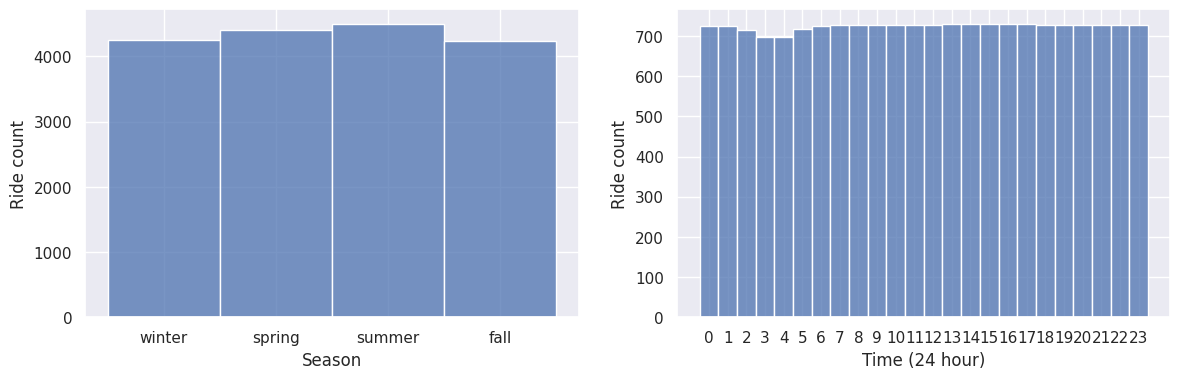

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
season_dist = clean_df['season'].astype(str)
hour_dist = clean_df['hr'].astype(str)

sns.histplot(season_dist, ax=ax[0])
ax[0].set_ylabel('Ride count')
ax[0].set_xlabel('Season')

sns.histplot(hour_dist, ax=ax[1])
ax[1].set_ylabel('Ride count')
ax[1].set_xlabel('Time (24 hour)')

plt.show()

Hasil plotting terlihat beberapa jumlah sampel yang tidak seimbang, diantaranya:
- Terdapat lebih banyak sampel pada musim panas dan semi
- Terdapat lebih sedikit sampel yang diambil pada pukul 02.00 hingga 05.00

### Explore jumlah workingday dan holiday

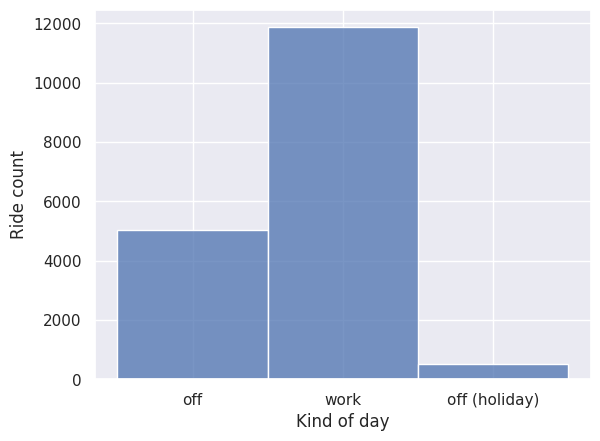

In [35]:
def convert_holyworkday(x):
  work = 'work' if x['workingday'] else 'off'
  holiday = '(holiday)' if x['holiday'] else ''
  return f'{work} {holiday}'.strip()
workholy_day = clean_df[['workingday', 'holiday']].agg(convert_holyworkday, axis=1)
sns.histplot(workholy_day)
plt.ylabel('Ride count')
plt.xlabel('Kind of day')
plt.show()

Hasil plot menunjukkan terdapat 3 jenis hari, yaitu:
- Hari kerja
- Hari libur kerja
- Hari libur holiday

Terlihat tidak ada hari kerja holiday

## Visualization & Explanatory Analysis

### Waktu cenderung terjadi keramaian

#### 1. Berdasarkan musim

/tmp/ipykernel_29490/1108416618.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_cnt = clean_df.groupby(['season'])[count_cols].mean().reset_index()


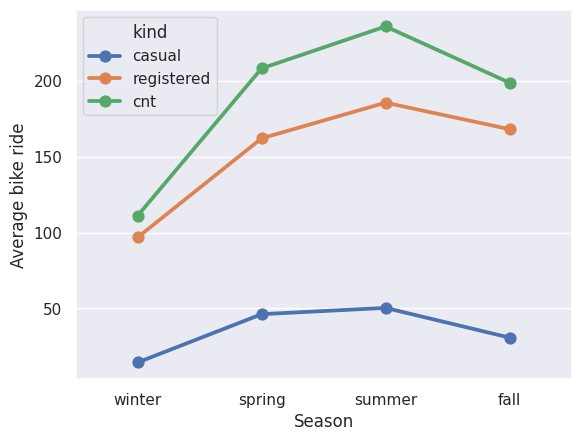

In [36]:
count_cols = ['casual', 'registered', 'cnt']
seasonal_cnt = clean_df.groupby(['season'])[count_cols].mean().reset_index()
seasonal_cnt = seasonal_cnt.melt(id_vars=['season'], var_name='kind', value_name='mean')
sns.pointplot(seasonal_cnt, hue='kind', x='season', y='mean')
plt.ylabel('Average bike ride')
plt.xlabel('Season')
plt.show()

Hasil diagram tersebut terlihat bahwa tingginya mobilitas cenderung terjadi pada musim panas dan musim semi. Hal ini juga mendukung hasil eksplorasi sebelumnya yang memperlihatkan korelasi positif antara suhu dan jumlah pesepeda.

Dari diagram tersebut juga bisa diambil kesimpulan bahwa pesepeda kasual lebih sedikit dibanding pesepeda yang terdaftar.

#### 2. Berdasarkan jam

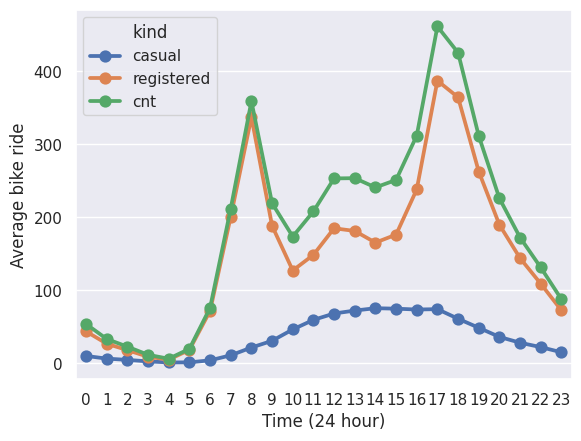

In [37]:

hourly_count = clean_df.groupby(['hr'])[count_cols].mean().reset_index()
hourly_count = hourly_count.melt(id_vars=['hr'], var_name='kind', value_name='mean')
sns.pointplot(hourly_count, hue='kind', x='hr', y='mean')
plt.ylabel('Average bike ride')
plt.xlabel('Time (24 hour)')
plt.show()

Hasil plotting terlihat bahwa tingginya mobilitas dengan sepeda terjadi pada pukul 07.00 hingga 09.00 dan pukul 16.00 hingga 19.00. Peningkatan jumlah mobilitas ini menjadi pertanda waktu berangkat dan pulangnya orang-orang.

Dari hasil plotting didapatkan juga bahwa pengguna sepeda kasual memiliki kecenderungan bersepeda sepanjang hari, yaitu pukul 07.00 hingga 21.00. Ini bisa jadi disebabkan karena pengguna sepeda kasual lebih fleksibel dalam penggunaan sepedanya sehingga dapat menggunakan sepeda sepanjang hari tanpa perlu dititipkan dan bergantian.

#### 3. Berdsarkan jam pada setiap musim

/tmp/ipykernel_29490/3307991474.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  hourly_seasonal_cnt = clean_df.pivot_table(values='cnt', index=['season', 'hr'], aggfunc='mean').reset_index()


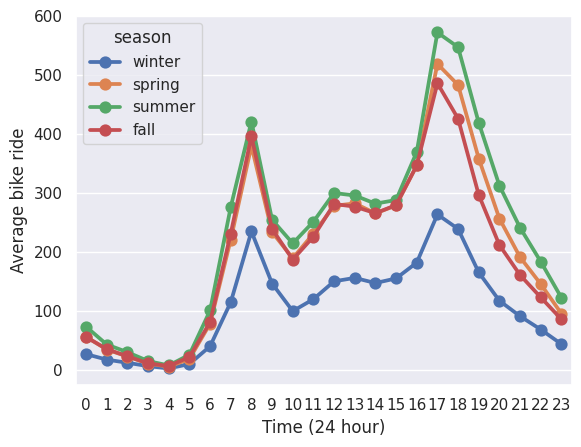

In [38]:
hourly_seasonal_cnt = clean_df.pivot_table(values='cnt', index=['season', 'hr'], aggfunc='mean').reset_index()
sns.pointplot(hourly_seasonal_cnt, hue='season', x='hr', y='cnt')
plt.ylabel('Average bike ride')
plt.xlabel('Time (24 hour)')
plt.show()

Hasil plot menunjukkan kecenderungan lonjakan jumlah pesepeda pada tiap musim tidak jauh berbeda. Diagram ini menunjukkan kekonsistenan 2 diagram sebelumnya.

#### 4. Berdasarkan bulan

/tmp/ipykernel_29490/947293446.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_cnt = clean_df.groupby(['mnth'])[count_cols].mean().reset_index()


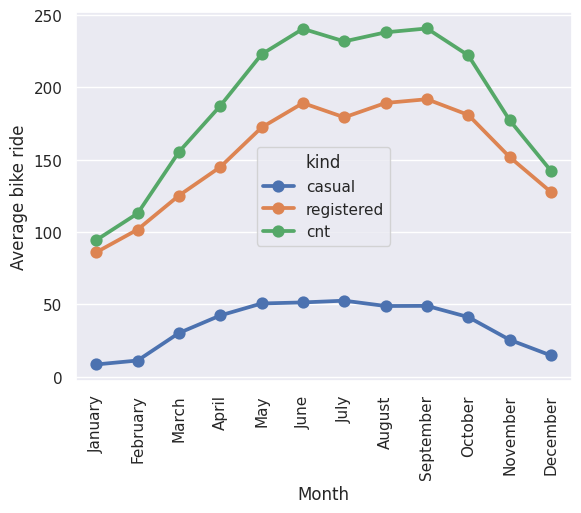

In [39]:

monthly_cnt = clean_df.groupby(['mnth'])[count_cols].mean().reset_index()
monthly_cnt = monthly_cnt.melt(id_vars=['mnth'], var_name='kind', value_name='mean')
sns.pointplot(monthly_cnt, hue='kind', x='mnth', y='mean')
plt.xticks(rotation=90)
plt.ylabel('Average bike ride')
plt.xlabel('Month')
plt.show()

### Faktor yang mempengaruhi keramaian pesepeda

#### 1. Berdasarkan hari (weekend, weekday, holiday)

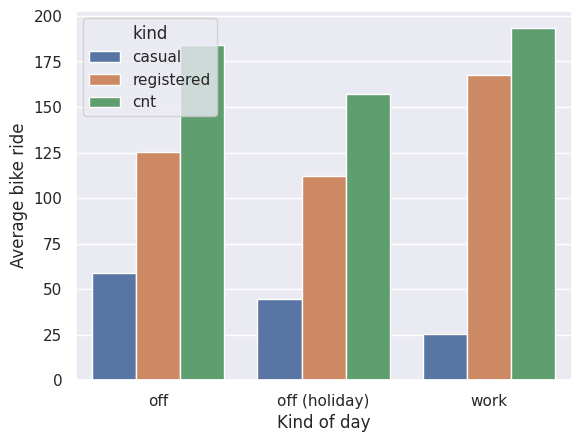

In [40]:
holyworking_cnt = clean_df[['holiday', 'workingday', *count_cols]].copy()
holyworking_cnt['holyworkday'] = holyworking_cnt.agg(convert_holyworkday, axis=1)
holyworking_cnt = holyworking_cnt[['holyworkday', *count_cols]].groupby('holyworkday').mean().reset_index()
holyworking_cnt = holyworking_cnt.melt(id_vars=['holyworkday'], var_name='kind', value_name='mean')

sns.barplot(holyworking_cnt, hue='kind', x='holyworkday', y='mean')
plt.ylabel('Average bike ride')
plt.xlabel('Kind of day')
plt.show()

/tmp/ipykernel_29490/2739345968.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_cnt = clean_df[['weekday', *count_cols]].groupby('weekday').mean().reset_index()


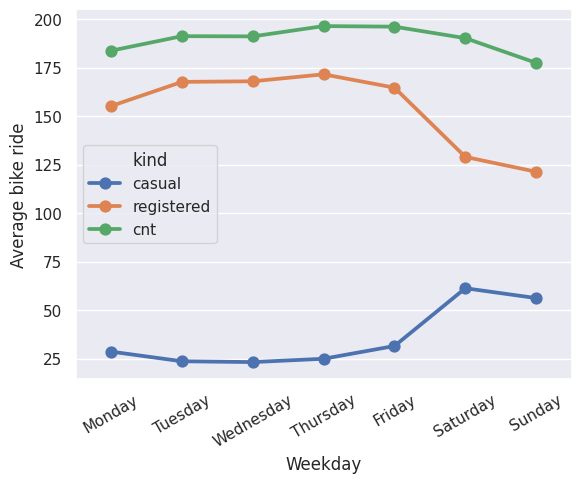

In [41]:

day_cnt = clean_df[['weekday', *count_cols]].groupby('weekday').mean().reset_index()
day_cnt = day_cnt.melt(id_vars=['weekday'], var_name='kind', value_name='mean')
sns.pointplot(day_cnt, hue='kind', x='weekday', y='mean')
plt.xticks(rotation=30)
plt.ylabel('Average bike ride')
plt.xlabel('Weekday')
plt.show()

Hasil plotting menunjukkan bahwa penggunaan sepeda paling tinggi terjadi pada hari kerja, walaupun tidak berselisih jauh dengan ketika hari libur. Temuan lain menunjukkan bahwa pada hari libur pengguna sepeda kasual mengalami peningkatan dan penyewa sepeda mengalami penurunan.

#### 3. Berdsarkan kondisi cuaca

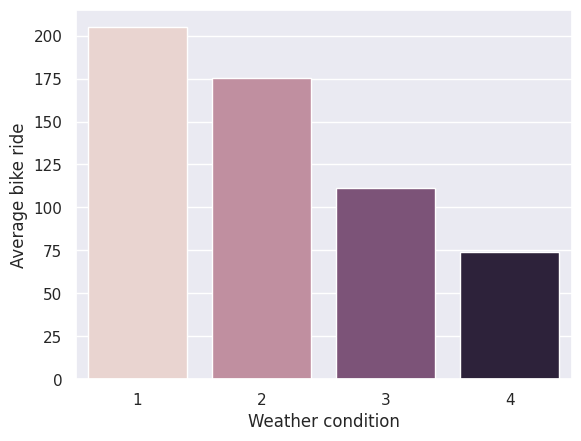

1 Clear, Few clouds, Partly cloudy, Partly cloudy
2 Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3 Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4 Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


In [42]:

weather_cnt = clean_df[['weathersit', 'cnt']].groupby('weathersit').mean().reset_index()
plot = sns.barplot(weather_cnt, hue='weathersit', x='weathersit', y='cnt', legend=False)
plt.ylabel('Average bike ride')
plt.xlabel('Weather condition')
plt.show()

wheathersit = {
  1: 'Clear, Few clouds, Partly cloudy, Partly cloudy',
  2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
  3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
  4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'
}
for key, val in wheathersit.items():
  print(key, val)

Diagram menunjukkan kecenderungan orang-orang menggunakan sepeda ketika kondisi cerah hingga sedikit berkabut. Sebaliknya, pesepeda ketika hujan dan bersalju relatif lebih sedikit.

## Conclusion

### Conclusion pertanyaan 1: 
- Keramaian pesepeda cenderung terjadi pada musim semi dan musim panas.
- Keramaian pesepeda cenderung terjadi pada siang hari, dengan lonjakan pada pukul 07.00 hingga 09.00 dan 16.00 hingga 19.00, sekaligus menandakan waktu berangkat dan pulangnya orang-orang.
- Tren perbedaan pesepeda menurut jam pada musim yang berbeda menunjukkan pola yang bersesuaian dengan 2 pernyataan sebelumnya.
- Keramaian pesepeda berdasarkan bulan cenderung mengikuti musim yang ada, yaitu penurunan terjadi pada bulan november hingga februari (musim dingin).

### Conclusion pertanyaan 2:
- Semakin tinggi suhu udara maka semakin banyak pesepeda, sebaliknya semakin rendah kelembaban maka semakin banyak jumlah pesepeda. Kecepatan angin tidak memiliki kontribusi signifikan terhadap jumlah pesepeda.
- Keramaian pesepeda cenderung terjadi pada hari kerja dan hari libur kerja, dengan perbedaan yang tidak signifikan. Pada hari libur tertentu (hari raya, peringatan, dll) jumlah pesepeda relatif lebih sedikit walaupun tidak signifikan.
- Pada weekday (senin hingga jumat) kebanyakan sepeda yang dipakai merupakan sepeda sewa (registerd), sedangkan pada weekend (sabtu dan minggu) terjadi kenaikan penggunaan sepeda kasual.
- Sepeda lebih banyak digunakan pada kondisi cuaca cerah hingga berkabut, sedangkan relatif lebih jarang digunakan pada cuaca hujan hingga badai salju.